Installation of stixpy: https://stixpy.readthedocs.io/en/latest/tutorials/quickstart.html

# STIX Quicklooks: lightcurves

### Download quicklook lightcurves

In [1]:
from sunpy.net import Fido, attrs as a
from stixpy.net.client import STIXClient  # This registers the STIX client with Fido

ql_query = Fido.search(a.Time('2020-06-05', '2020-06-07'), a.Instrument.stix,
                    a.stix.DataProduct.ql_lightcurve)

C:\Users\mussesm1.SDSCI\AppData\Local\miniconda3\envs\stixenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ql_files = Fido.fetch(ql_query)

Files Downloaded: 100%|████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 10.17file/s]


### Visualize QL lightcurves

In [3]:
from datetime import datetime

from sunpy.timeseries import TimeSeries
from stixpy.timeseries import quicklook # This registers the STIX timeseries with sunpy

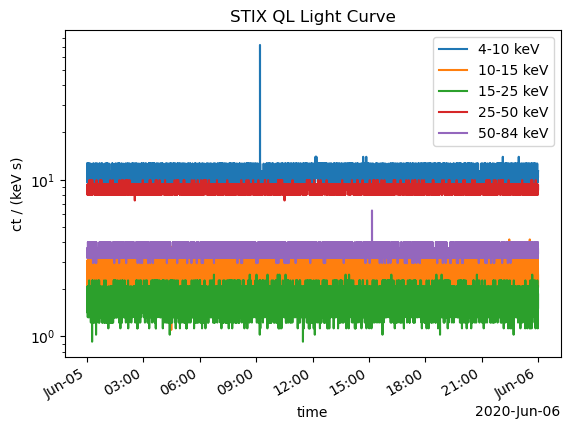

In [4]:
ql_lightcurves = TimeSeries(ql_files)
ql_lightcurves[0].peek()

Combine the three days together

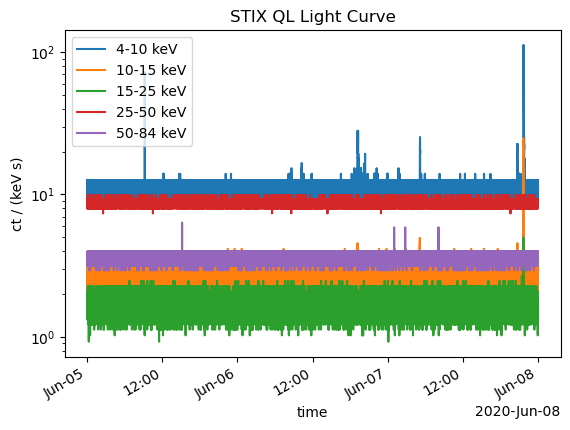

In [5]:
combined_ts = ql_lightcurves[0]
for lc in ql_lightcurves[1:]:
    combined_ts = combined_ts.concatenate(lc)

combined_ts.peek()

In [6]:
import matplotlib.pyplot as plt

(np.float64(18420.895833333332), np.float64(18420.916666666668))

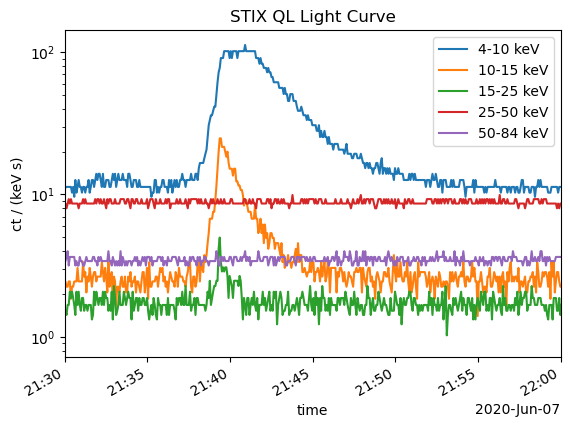

In [7]:
combined_ts.plot()
plt.xlim(datetime(2020, 6, 7, 21, 30), datetime(2020, 6, 7, 22, 0))

# Science data


### Search and download

In [8]:
sci_query = Fido.search(a.Time('2020-06-07T21:30', '2020-06-07T22:00'), a.Instrument.stix,
                        a.stix.DataType.sci)

In [9]:
sci_files = Fido.fetch(sci_query[0][[4,-1]])
sci_files = sorted(sci_files)

Files Downloaded:   0%|                                                                        | 0/2 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-spec_20200607T213800-20200607T214358_V02_1178428992-53860.fits:   0%| | 0.00/124k [00:00<?, ?B/s]
solo_L1_stix-sci-xray-cpd_20200607T213800-20200607T214038_V02_1178428944-49817.fits:   0%|  | 0.00/625k [00:00<?, ?B/s]

solo_L1_stix-sci-xray-spec_20200607T213800-20200607T214358_V02_1178428992-53860.fits:   1%| | 1.02k/124k [00:00<00:36, 
solo_L1_stix-sci-xray-cpd_20200607T213800-20200607T214038_V02_1178428944-49817.fits:   0%| | 1.02k/625k [00:00<03:00, 3

Files Downloaded:  50%|████████████████████████████████                                | 1/2 [00:00<00:00,  1.42file/s]
solo_L1_stix-sci-xray-cpd_20200607T213800-20200607T214038_V02_1178428944-49817.fits:  32%|▎| 201k/625k [00:00<00:00, 51
Files Downloaded: 100%|████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.22file/s]


### Spectrogram

In [11]:
from stixpy.product import Product

In [12]:
spec = Product(sci_files[1])
spec

Spectrogram   <sunpy.time.timerange.TimeRange object at 0x2723094ef30>
    Start: 2020-06-07 21:38:00
    End:   2020-06-07 21:43:58
    Center:2020-06-07 21:40:59
    Duration:0.004142361111111104 days or
           0.09941666666666649 hours or
           5.964999999999989 minutes or
           357.89999999999935 seconds
    DetectorMasks
    [0]: [0,1,2,3,4,5,6,7,_,_,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]

    PixelMasks
    [0...337]: [['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']]

    EnergyEdgeMasks
    [0]: [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]

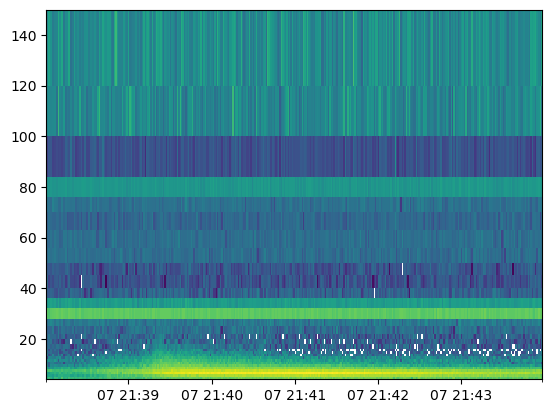

In [13]:
spec.plot_spectrogram()

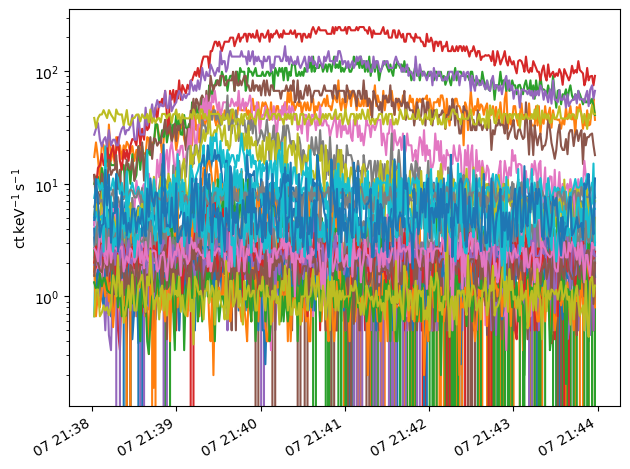

In [14]:
spec.plot_timeseries()

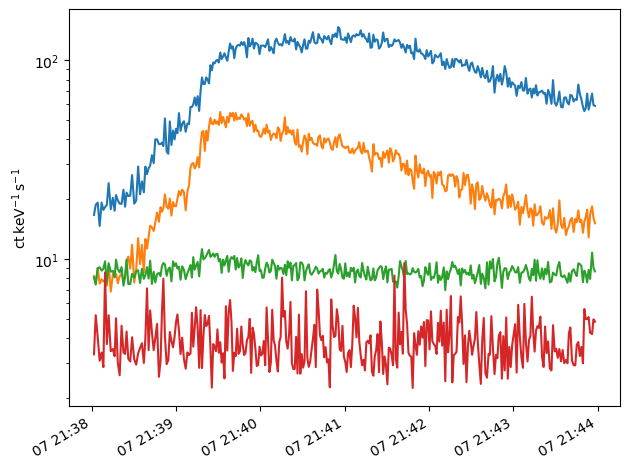

In [15]:
spec.plot_timeseries(energy_indices=[[1, 4], [4, 10],[10, 20], [20, 30]])

### Pixel data

In [16]:
cpd = Product(sci_files[0])
cpd

CompressedPixelData   <sunpy.time.timerange.TimeRange object at 0x27231cba5d0>
    Start: 2020-06-07 21:38:00
    End:   2020-06-07 21:40:38
    Center:2020-06-07 21:39:19
    Duration:0.001829861111111164 days or
           0.043916666666667936 hours or
           2.635000000000076 minutes or
           158.10000000000457 seconds
    DetectorMasks
    [0...144]: [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]

    PixelMasks
    [0...144]: [['1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0']]

    EnergyEdgeMasks
    [0]: [_,_,2,3,4,5,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_]

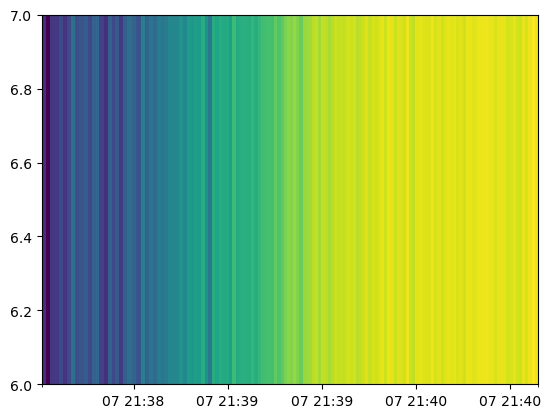

In [17]:
cpd.plot_spectrogram()

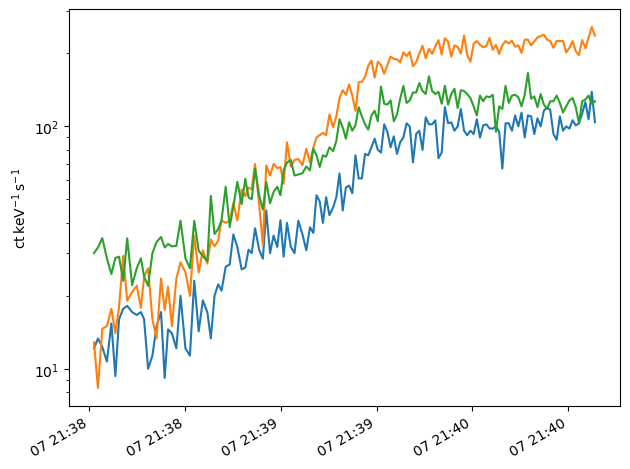

In [18]:
cpd.plot_timeseries()

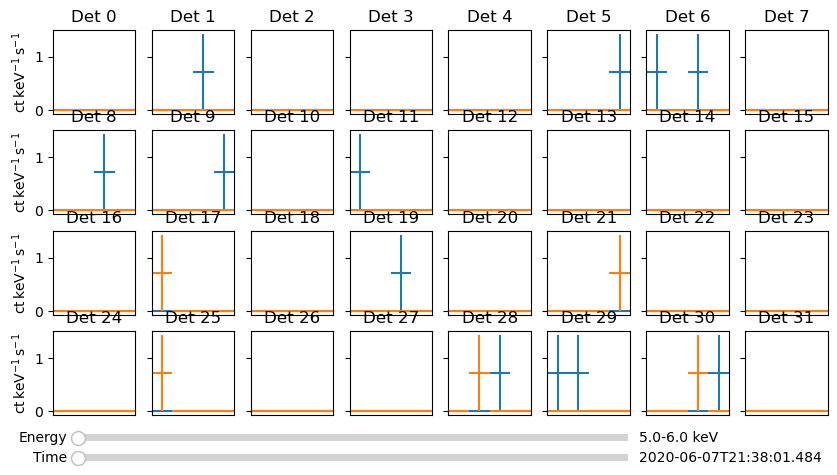

In [19]:
cpd.plot_pixels()

# Imaging

In [20]:
import logging

import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from sunpy.coordinates import HeliographicStonyhurst, Helioprojective
from sunpy.map import Map, make_fitswcs_header
from sunpy.time import TimeRange
from xrayvision.clean import vis_clean
from xrayvision.imaging import vis_to_image, vis_to_map
from xrayvision.mem import mem, resistant_mean

from stixpy.calibration.visibility import calibrate_visibility, create_meta_pixels, create_visibility
from stixpy.coordinates.frames import STIXImaging
from stixpy.coordinates.transforms import get_hpc_info
from stixpy.imaging.em import em
from stixpy.map.stix import STIXMap  # noqa
from stixpy.product import Product

In [21]:
logger = logging.getLogger(__name__)

## Download files

### Download science pixel file

In [53]:
cpd_sci = Product(
    "http://pub099.cs.technik.fhnw.ch/fits/L1/2021/09/23/SCI/solo_L1_stix-sci-xray-cpd_20210923T152015-20210923T152639_V02_2109230030-62447.fits"
)

See what's inside

In [54]:
cpd_sci

CompressedPixelData   <sunpy.time.timerange.TimeRange object at 0x2723eeff9b0>
    Start: 2021-09-23 15:20:15
    End:   2021-09-23 15:26:39
    Center:2021-09-23 15:23:27
    Duration:0.004439814814814813 days or
           0.10655555555555551 hours or
           6.393333333333331 minutes or
           383.59999999999985 seconds
    DetectorMasks
    [0...697]: [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]

    PixelMasks
    [0...697]: [['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']]

    EnergyEdgeMasks
    [0]: [_,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,_]

### Download background pixel file

In [55]:
cpd_bkg = Product(
    "http://pub099.cs.technik.fhnw.ch/fits/L1/2021/09/23/SCI/solo_L1_stix-sci-xray-cpd_20210923T095923-20210923T113523_V02_2109230083-57078.fits"
)

See what's inside

In [56]:
cpd_bkg

CompressedPixelData   <sunpy.time.timerange.TimeRange object at 0x27240069100>
    Start: 2021-09-23 09:59:23
    End:   2021-09-23 11:35:23
    Center:2021-09-23 10:47:23
    Duration:0.06666666666666665 days or
           1.5999999999999996 hours or
           95.99999999999997 minutes or
           5759.999999999999 seconds
    DetectorMasks
    [0]: [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]

    PixelMasks
    [0]: [['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']]

    EnergyEdgeMasks
    [0]: [_,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]

## Subtract background to data

Set energy range and time intervals for data and background

In [57]:
time_range_sci = ["2021-09-23T15:20:00", "2021-09-23T15:23:00"]
time_range_bkg = [
    "2021-09-23T09:00:00",
    "2021-09-23T12:00:00",
]  # Set this range larger than the actual observation time
energy_range = [25, 28] * u.keV

Create the metapixels A, B, C, D for the flare data and the background data

In [26]:
meta_pixels_sci = create_meta_pixels(
    cpd_sci, time_range=time_range_sci, energy_range=energy_range, flare_location=[0, 0] * u.arcsec, no_shadowing=True
)

In [27]:
meta_pixels_bkg = create_meta_pixels(
    cpd_bkg, time_range=time_range_bkg, energy_range=energy_range, flare_location=[0, 0] * u.arcsec, no_shadowing=True
)

Perform the background subtraction

In [28]:
meta_pixels_bkg_subtracted = {
    **meta_pixels_sci,
    "abcd_rate_kev_cm": meta_pixels_sci["abcd_rate_kev_cm"] - meta_pixels_bkg["abcd_rate_kev_cm"],
    "abcd_rate_error_kev_cm": np.sqrt(
        meta_pixels_sci["abcd_rate_error_kev_cm"] ** 2 + meta_pixels_bkg["abcd_rate_error_kev_cm"] ** 2
    ),
}

## Create visibilities

Create visibilities from meta pixels

In [29]:
vis = create_visibility(meta_pixels_bkg_subtracted)

Calibrate the visibilities

In [30]:
cal_vis = calibrate_visibility(vis)

Select detectors 10 to 7 

In [31]:
# order by sub-collimator e.g. 10a, 10b, 10c, 9a, 9b, 9c ....
isc_10_7 = [3, 20, 22, 16, 14, 32, 21, 26, 4, 24, 8, 28]
idx = np.argwhere(np.isin(cal_vis.meta["isc"], isc_10_7)).ravel()

In [32]:
vis10_7 = cal_vis[idx]

## Reconstruct images

### Image parameters

In [33]:
imsize = [512, 512] * u.pixel  # number of pixels of the map to reconstruct
pixel = [10, 10] * u.arcsec / u.pixel  # pixel size in arcsec

### Backprojection: full disk

Make a full-disk back-projection (inverse transform) map

In [34]:
bp_image = vis_to_image(vis10_7, imsize, pixel_size=pixel)

Get the necessary metadata to create a sunpy map in the STIXImaging frame

In [36]:
vis_tr = TimeRange(vis.meta["time_range"])
roll, solo_xyz, pointing = get_hpc_info(vis_tr.start, vis_tr.end)
solo = HeliographicStonyhurst(*solo_xyz, obstime=vis_tr.center, representation_type="cartesian")
coord = STIXImaging(0 * u.arcsec, 0 * u.arcsec, obstime=vis_tr.start, obstime_end=vis_tr.end, observer=solo)
header = make_fitswcs_header(
    bp_image, coord, telescope="STIX", observatory="Solar Orbiter", scale=[10, 10] * u.arcsec / u.pix
)
fd_bp_map = Map((bp_image, header))

Files Downloaded:   0%|                                                                        | 0/1 [00:00<?, ?file/s]
solo_L2_stix-aux-ephemeris_20210923_V02U.fits:   0%|                                        | 0.00/397k [00:00<?, ?B/s]
solo_L2_stix-aux-ephemeris_20210923_V02U.fits:   0%|                               | 1.02k/397k [00:00<01:56, 3.41kB/s]
solo_L2_stix-aux-ephemeris_20210923_V02U.fits:  50%|████████████████▋                | 201k/397k [00:00<00:00, 510kB/s]
Files Downloaded: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.25file/s]
2025-02-19T15:39:48Z INFO stixpy.coordinates.transforms 139: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec
2025-02-19 15:39:48 - stixpy.coordinates.transforms - INFO: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec


Convert the coordinates and make a map in Helioprojective coordinates, and rotate so that North is up.

In [37]:
hpc_ref = coord.transform_to(Helioprojective(observer=solo, obstime=vis_tr.center))  # Center of STIX pointing in HPC
header_hp = make_fitswcs_header(bp_image, hpc_ref, scale=[10, 10] * u.arcsec / u.pix, rotation_angle=90 * u.deg + roll)
hp_map = Map((bp_image, header_hp))
hp_map_rotated = hp_map.rotate()

2025-02-19T15:40:00Z INFO stixpy.coordinates.transforms 139: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec
2025-02-19 15:40:00 - stixpy.coordinates.transforms - INFO: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec


Plot both maps

2025-02-19T15:54:28Z INFO stixpy.coordinates.transforms 139: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec
2025-02-19 15:54:28 - stixpy.coordinates.transforms - INFO: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec


<CoordinatesMap with 2 world coordinates:

  index aliases    type   unit    wrap   format_unit visible
  ----- ------- --------- ---- --------- ----------- -------
      0     lon longitude  deg 180.0 deg         deg     yes
      1     lat  latitude  deg      None         deg     yes

>

2025-02-19T15:54:28Z INFO stixpy.coordinates.transforms 139: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec
2025-02-19 15:54:28 - stixpy.coordinates.transforms - INFO: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec
2025-02-19T15:54:28Z INFO stixpy.coordinates.transforms 139: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec
2025-02-19 15:54:28 - stixpy.coordinates.transforms - INFO: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec
2025-02-19T15:54:28Z INFO stixpy.coordinates.transforms 139: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec
2025-02-19 15:54:28 - stixpy.coordinates.transforms - INFO: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec
2025-02-19T15:54:28Z INFO stixpy.coordinates.transforms 139: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec
2025-02-19 15:54:28 - stixpy.coordinates.transforms - INFO: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec
2025-02-19T15:54:28Z INFO stixpy.coordinates.transforms 139: Using SAS point

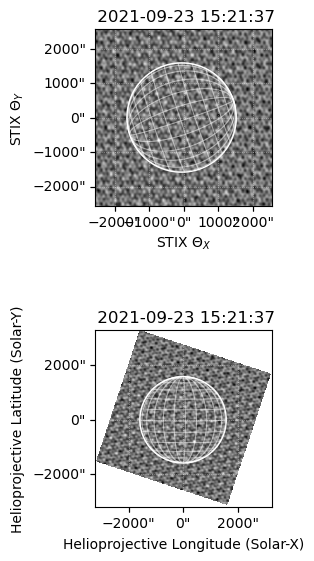

In [59]:
fig = plt.figure(layout="constrained", figsize=(3, 6))
ax = fig.subplot_mosaic(
    [["stix"], ["hpc"]], per_subplot_kw={"stix": {"projection": fd_bp_map}, "hpc": {"projection": hp_map_rotated}}
)
fd_bp_map.plot(axes=ax["stix"])
fd_bp_map.draw_limb()
fd_bp_map.draw_grid()

hp_map_rotated.plot(axes=ax["hpc"])
hp_map_rotated.draw_limb()
hp_map_rotated.draw_grid()


### Flare position

Estimate the flare location and plot on top of back projection map. Note the coordinates are automatically converted from the STIXImaging to Helioprojective

In [60]:
max_pixel = np.argwhere(fd_bp_map.data == fd_bp_map.data.max()).ravel() * u.pixel
# because WCS axes and array are reversed
max_stix = fd_bp_map.pixel_to_world(max_pixel[1], max_pixel[0])

ax["stix"].plot_coord(max_stix, marker=".", markersize=50, fillstyle="none", color="r", markeredgewidth=2)
ax["hpc"].plot_coord(max_stix, marker=".", markersize=50, fillstyle="none", color="r", markeredgewidth=2)
fig.tight_layout()

2025-02-19T15:54:37Z INFO stixpy.coordinates.transforms 139: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec
2025-02-19 15:54:37 - stixpy.coordinates.transforms - INFO: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec
2025-02-19T15:54:37Z INFO stixpy.coordinates.transforms 139: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec
2025-02-19 15:54:37 - stixpy.coordinates.transforms - INFO: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec
2025-02-19T15:54:37Z INFO stixpy.coordinates.transforms 139: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec
2025-02-19 15:54:37 - stixpy.coordinates.transforms - INFO: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec
2025-02-19T15:54:37Z INFO stixpy.coordinates.transforms 139: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec
2025-02-19 15:54:37 - stixpy.coordinates.transforms - INFO: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec
2025-02-19T15:54:37Z INFO stixpy.coordinates.transforms 139: Using SAS point

### Back-projection

Use estimated flare location to create more accurate visibilities

In [40]:
meta_pixels_sci = create_meta_pixels(
    cpd_sci, time_range=time_range_sci, energy_range=energy_range, flare_location=max_stix, no_shadowing=True
)

meta_pixels_bkg_subtracted = {
    **meta_pixels_sci,
    "abcd_rate_kev_cm": meta_pixels_sci["abcd_rate_kev_cm"] - meta_pixels_bkg["abcd_rate_kev_cm"],
    "abcd_rate_error_kev_cm": np.sqrt(
        meta_pixels_sci["abcd_rate_error_kev_cm"] ** 2 + meta_pixels_bkg["abcd_rate_error_kev_cm"] ** 2
    ),
}

vis = create_visibility(meta_pixels_bkg_subtracted)
cal_vis = calibrate_visibility(vis, flare_location=max_stix)

2025-02-19T15:41:25Z INFO stixpy.coordinates.transforms 139: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec
2025-02-19 15:41:25 - stixpy.coordinates.transforms - INFO: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec


Select detectors 10 to 3

In [41]:
isc_10_3 = [3, 20, 22, 16, 14, 32, 21, 26, 4, 24, 8, 28, 15, 27, 31, 6, 30, 2, 25, 5, 23, 7, 29, 1]
idx = np.argwhere(np.isin(cal_vis.meta["isc"], isc_10_3)).ravel()

Create an ``xrayvsion`` visibility object

In [42]:
cal_vis.meta["offset"] = max_stix
vis10_3 = cal_vis[idx]

Set up image parameters

In [43]:
imsize = [129, 129] * u.pixel  # number of pixels of the map to reconstruct
pixel = [2, 2] * u.arcsec / u.pixel  # pixel size in arcsec

Create a back projection image with natural weighting

In [44]:
bp_nat = vis_to_image(vis10_3, imsize, pixel_size=pixel)

Create a back projection image with uniform weighting

In [45]:
bp_uni = vis_to_image(vis10_3, imsize, pixel_size=pixel, scheme="uniform")

Create a `sunpy.map.Map` with back projection

In [46]:
bp_map = vis_to_map(vis10_3, imsize, pixel_size=pixel)

### CLEAN map

Create a clean image using the clean algorithm `vis_clean`

In [47]:
niter = 200  # number of iterations
gain = 0.1  # gain used in each clean iteration
beam_width = 20.0 * u.arcsec
clean_map, model_map, resid_map = vis_clean(
    vis10_3, imsize, pixel_size=pixel, gain=gain, niter=niter, clean_beam_width=20 * u.arcsec
)

2025-02-19T15:42:06Z INFO xrayvision.clean 124: Iter: 0, strength: 1.9341441654467764, location: (np.int64(59), np.int64(66))
2025-02-19 15:42:06 - xrayvision.clean - INFO: Iter: 0, strength: 1.9341441654467764, location: (np.int64(59), np.int64(66))
2025-02-19T15:42:06Z INFO xrayvision.clean 124: Iter: 25, strength: 0.484111474377344, location: (np.int64(80), np.int64(47))
2025-02-19 15:42:06 - xrayvision.clean - INFO: Iter: 25, strength: 0.484111474377344, location: (np.int64(80), np.int64(47))
2025-02-19T15:42:06Z INFO xrayvision.clean 145: Largest residual negative
2025-02-19 15:42:06 - xrayvision.clean - INFO: Largest residual negative


Create a sunpy map for the clean image in Helioprojective

In [48]:
header = make_fitswcs_header(
    clean_map.data,
    max_stix.transform_to(Helioprojective(obstime=vis_tr.center, observer=solo)),
    telescope="STIX",
    observatory="Solar Orbiter",
    scale=pixel,
    rotation_angle=90 * u.deg + roll,
)

2025-02-19T15:42:13Z INFO stixpy.coordinates.transforms 139: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec
2025-02-19 15:42:13 - stixpy.coordinates.transforms - INFO: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec


### MEM GE map

Create a map using the MEM GE algorithm `mem`

In [49]:
snr_value, _ = resistant_mean((np.abs(vis10_3.visibilities) / vis10_3.amplitude_uncertainty).flatten(), 3)
percent_lambda = 2 / (snr_value**2 + 90)
mem_map = mem(vis10_3, shape=imsize, pixel_size=pixel, percent_lambda=percent_lambda)

2025-02-19T15:42:20Z INFO xrayvision.mem 159: Iter: 0, Chi2: 235.87915282079257
2025-02-19 15:42:20 - xrayvision.mem - INFO: Iter: 0, Chi2: 235.87915282079257
2025-02-19T15:42:20Z INFO xrayvision.mem 159: Iter: 25, Chi2: 24.966868586208275
2025-02-19 15:42:20 - xrayvision.mem - INFO: Iter: 25, Chi2: 24.966868586208275
2025-02-19T15:42:20Z INFO xrayvision.mem 159: Iter: 50, Chi2: 19.793047569130245
2025-02-19 15:42:20 - xrayvision.mem - INFO: Iter: 50, Chi2: 19.793047569130245
2025-02-19T15:42:20Z INFO xrayvision.mem 159: Iter: 75, Chi2: 17.595116444087417
2025-02-19 15:42:20 - xrayvision.mem - INFO: Iter: 75, Chi2: 17.595116444087417
2025-02-19T15:42:20Z INFO xrayvision.mem 159: Iter: 100, Chi2: 16.30890229547744
2025-02-19 15:42:20 - xrayvision.mem - INFO: Iter: 100, Chi2: 16.30890229547744
2025-02-19T15:42:20Z INFO xrayvision.mem 159: Iter: 125, Chi2: 15.459699781308199
2025-02-19 15:42:20 - xrayvision.mem - INFO: Iter: 125, Chi2: 15.459699781308199
2025-02-19T15:42:20Z INFO xrayvisi

### EM map

Create a map using the EM algorithm `EM`

In [50]:
em_map = em(
    meta_pixels_bkg_subtracted["abcd_rate_kev_cm"],
    cal_vis,
    shape=imsize,
    pixel_size=pixel,
    flare_location=max_stix,
    idx=idx,
)

2025-02-19T15:43:03Z INFO stixpy.coordinates.transforms 139: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec
2025-02-19 15:43:03 - stixpy.coordinates.transforms - INFO: Using SAS pointing: [[ 3.44543839 59.88232422]] arcsec
2025-02-19T15:43:03Z INFO stixpy.imaging.em 180: Iteration: 25, StdDeV: 0.13949095917389578, C-stat: 0.08518964619610414
2025-02-19 15:43:03 - stixpy.imaging.em - INFO: Iteration: 25, StdDeV: 0.13949095917389578, C-stat: 0.08518964619610414
2025-02-19T15:43:03Z INFO stixpy.imaging.em 180: Iteration: 50, StdDeV: 0.030753342023500826, C-stat: 0.054755148770520234
2025-02-19 15:43:03 - stixpy.imaging.em - INFO: Iteration: 50, StdDeV: 0.030753342023500826, C-stat: 0.054755148770520234
2025-02-19T15:43:03Z INFO stixpy.imaging.em 180: Iteration: 75, StdDeV: 0.006042412625746072, C-stat: 0.045376126841306194
2025-02-19 15:43:03 - stixpy.imaging.em - INFO: Iteration: 75, StdDeV: 0.006042412625746072, C-stat: 0.045376126841306194
2025-02-19T15:43:03Z INFO stixpy.imagi

### Compare different algorithms

In [51]:
clean_map = Map((clean_map.data, header)).rotate()
bp_map = Map((bp_nat, header)).rotate()
mem_map = Map((mem_map.data, header)).rotate()
em_map = Map((em_map, header)).rotate()

vmax = max([clean_map.data.max(), mem_map.data.max(), em_map.data.max()])

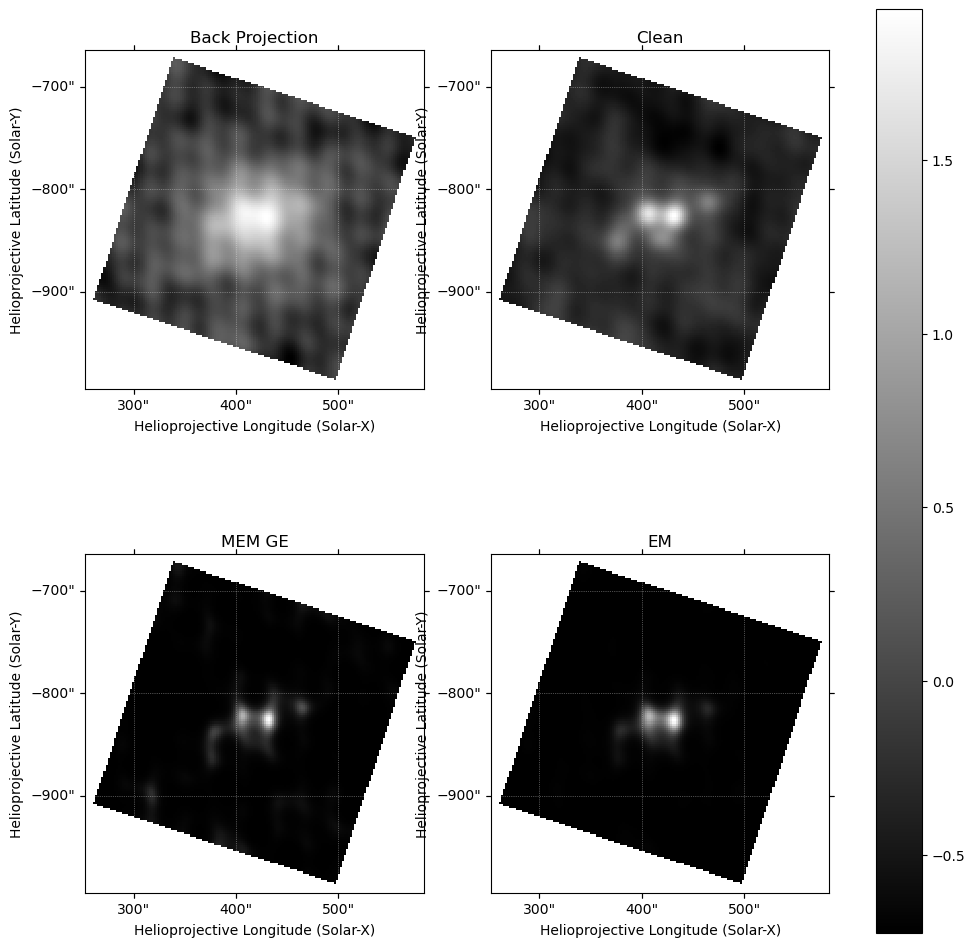

In [52]:
fig = plt.figure(figsize=(12, 12))
ax = fig.subplot_mosaic(
    [
        ["bp", "clean"],
        ["mem", "em"],
    ],
    subplot_kw={"projection": clean_map},
)
a = bp_map.plot(axes=ax["bp"])
ax["bp"].set_title("Back Projection")
b = clean_map.plot(axes=ax["clean"])
ax["clean"].set_title("Clean")
c = mem_map.plot(axes=ax["mem"])
ax["mem"].set_title("MEM GE")
d = em_map.plot(axes=ax["em"])
ax["em"].set_title("EM")
fig.colorbar(a, ax=ax.values())
plt.show()